In [2]:
import pandas as p 

movies = p.read_csv("fandango_score_comparison.csv")
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


# Comapring Metacritic and Fandango ratings

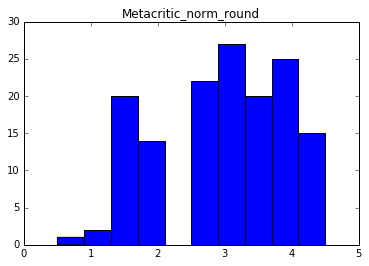

(0.0, 5.0)

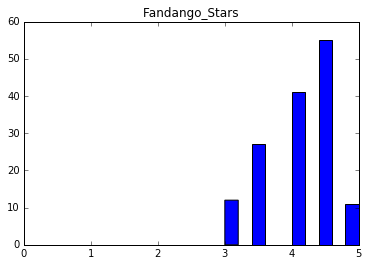

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

#Histogram of Metacritic_norm_round and Fandango_Stars

plt.hist(movies["Metacritic_norm_round"])
plt.title("Metacritic_norm_round")
plt.xlim(0.0,5.0)
plt.show()
plt.hist(movies["Fandango_Stars"])
plt.title("Fandango_Stars")
plt.xlim(0.0,5.0)

### Observations 

> - Metacritic ratings are distributed over the range 0.5 - 4.5
> - Fandango ratings are distributed from 3.0 - 5.0

>There are no scores below a 3.0 in the Fandango reviews. The Fandango reviews also tend to center around 4.5 and 4.0, whereas the Metacritic reviews seem to center around 3.0 and 3.5.

In [4]:
import numpy as np

movie_subset = movies[["Fandango_Stars","Metacritic_norm_round"]]

print(movie_subset.describe())

f_mean = movies["Fandango_Stars"].mean()
m_mean = movies["Metacritic_norm_round"].mean()
f_std = movies["Fandango_Stars"].std()
m_std = movies["Metacritic_norm_round"].std()
f_median = movies["Fandango_Stars"].median()
m_median = movies["Metacritic_norm_round"].median()
print("***"*10)
print("Fandango Mean",f_mean)
print("Meta critic Mean",m_mean)
print("\nFandando std deviation ",f_std)
print("Metacritic std deviation",m_std)
print("\nFandango Median",f_median)
print("Meta critic Median ",m_median)

       Fandango_Stars  Metacritic_norm_round
count      146.000000             146.000000
mean         4.089041               2.972603
std          0.540386               0.990961
min          3.000000               0.500000
25%          3.500000               2.125000
50%          4.000000               3.000000
75%          4.500000               4.000000
max          5.000000               4.500000
******************************
Fandango Mean 4.08904109589
Meta critic Mean 2.97260273973

Fandando std deviation  0.540385977979
Metacritic std deviation 0.990960561374

Fandango Median 4.0
Meta critic Median  3.0


### Fandango vs Metacritic Methodology

> Fandango appears to inflate ratings and isn't transparent about how it calculates and aggregates ratings. Metacritic publishes each individual critic rating, and is transparent about how they aggregate them to get a final rating.

### Fandango vs Metacritic number differences
> The median metacritic score appears higher than the mean metacritic score because a few very low reviews "drag down" the median. The median fandango score is lower than the mean fandango score because a few very high ratings "drag up" the mean.

>Fandango ratings appear clustered between 3 and 5, and have a much narrower random than Metacritic reviews, which go from 0 to 5.

>Fandango ratings in general appear to be higher than metacritic ratings.

>These may be due to movie studio influence on Fandango ratings, and the fact that Fandango calculates its ratings in a hidden way.

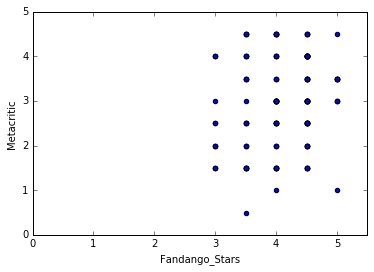

In [5]:
plt.scatter(movies["Fandango_Stars"],movies["Metacritic_norm_round"])


plt.xlim(0.0,5.5)
plt.ylim(0.0,5.0)

plt.xlabel("Fandango_Stars")
plt.ylabel("Metacritic")

>Several movies appear to have low ratings in Metacritic and high ratings in Fandango, or vice versa. We can explore this further by finding the differences between the columns.

In [6]:
movies["fm_diff"] = movies["Fandango_Stars"] - movies["Metacritic_norm_round"]
movies["fm_diff"] = np.absolute(movies["fm_diff"])
movies.sort_values(by="fm_diff", ascending=False, inplace=True)

#Top movies which have the largest diff in the ratings 
movies[["FILM","Fandango_Stars","Metacritic_norm_round","fm_diff"]].head()

,FILM,Fandango_Stars,Metacritic_norm_round,fm_diff
3,Do You Believe? (2015),5.0,1.0,4.0
85,Little Boy (2015),4.5,1.5,3.0
47,Annie (2014),4.5,1.5,3.0
19,Pixels (2015),4.5,1.5,3.0
134,The Longest Ride (2015),4.5,1.5,3.0


In [7]:
from scipy.stats import pearsonr

r_value, p_value = pearsonr(movies["Fandango_Stars"],movies["Metacritic_norm_round"])

print("The R-value (Corelation coefficient) of Fandango_Stars vs Metacritic_norm_round :", r_value)


The R-value (Corelation coefficient) of Fandango_Stars vs Metacritic_norm_round : 0.178449190739


### Fandango and Metacritic correlation

>The low correlation between Fandango and Metacritic scores indicates that Fandango scores aren't just inflated, they are fundamentally different. For whatever reason, it appears like Fandango both inflates scores overall, and inflates scores differently depending on the movie.
(Because if Fandango just inflates the scores then the corelation between fandango and metacritic should be high but it is very low)

In [8]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, stderr_slope = linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

# Predicting the value of movie in Fandango that got 3.0 in Metacritic 
pred_3 = (slope*3)+intercept

print("Prediction of Fandango score(metacritic rating 3.0) : {:0.2f}".format(pred_3))

Prediction of Fandango score(metacritic rating 3.0) : 4.09


> Inorder to better visualize how the line (linear regression model) relates to the existing datapoints. 
This can help to see if two variables are linearly related or not.

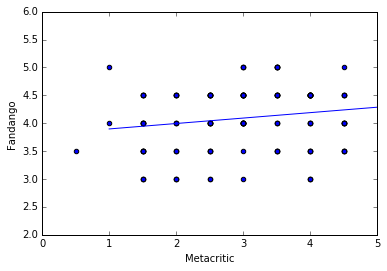

In [16]:
# the equation for line is y=mx+c y: Fandango x: Metacritic

pred_1 = slope + intercept

pred_5 = (slope*5) + intercept

plt.scatter(movies["Metacritic_norm_round"],movies["Fandango_Stars"])
plt.plot([1.0,5.0],[pred_1,pred_5])
plt.xlim(0,5.0)
plt.ylim(2.0,6.0)
plt.xlabel("Metacritic")
plt.ylabel("Fandango")